In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data_dir = '/content/drive/MyDrive/CVPR/synthetic_data.csv'

In [5]:
data = pd.read_csv(data_dir)

In [6]:
# Extract features and labels
features = data[['x', 'y']].values
labels = data['label'].values

In [15]:
def one_hot_encode(labels, num_classes=3):
    encoded = np.zeros((labels.size, num_classes))
    for idx, label in enumerate(labels):
        encoded[idx, label] = 1
    return encoded

In [8]:
Y2_train = one_hot_encode(labels)
features_train = features

In [ ]:
class Neural_Network:
    def __init__(self):
        input_layer_neurons = 2
        hidden_layer_neurons_1 = 5
        hidden_layer_neurons_2 = 6
        hidden_layer_neurons_3 = 4
        output_layer_neurons = 3

        self.learning_rate = 0.02
        self.Weight_Input_Hidden1 = np.random.randn(input_layer_neurons, hidden_layer_neurons_1)
        self.Weight_Hidden1_Hidden2 = np.random.randn(hidden_layer_neurons_1, hidden_layer_neurons_2)
        self.Weight_Hidden2_Hidden3 = np.random.randn(hidden_layer_neurons_2, hidden_layer_neurons_3)
        self.Weight_Hidden3_Output = np.random.randn(hidden_layer_neurons_3, output_layer_neurons)

    def forwardProp(self, input):
        self.hiddenLayer1Input = np.dot(input, self.Weight_Input_Hidden1)
        self.hiddenLayer1Output = self.Sigmoid(self.hiddenLayer1Input)

        self.hiddenLayer2Input = np.dot(self.hiddenLayer1Output, self.Weight_Hidden1_Hidden2)
        self.hiddenLayer2Output = self.Sigmoid(self.hiddenLayer2Input)

        self.hiddenLayer3Input = np.dot(self.hiddenLayer2Output, self.Weight_Hidden2_Hidden3)
        self.hiddenLayer3Output = self.Sigmoid(self.hiddenLayer3Input)

        self.outputLayerInput = np.dot(self.hiddenLayer3Output, self.Weight_Hidden3_Output)
        self.outputLayerOutput = self.Softmax(self.outputLayerInput)

        return self.outputLayerOutput

    def BackProp(self, input, target, pred):
        output_error = target - pred
        output_delta = self.learning_rate * output_error

        hiddenLayer3_error = np.dot(output_delta, self.Weight_Hidden3_Output.T)
        hiddenLayer3_delta = self.learning_rate * hiddenLayer3_error * self.Sigmoid_Deriv(self.hiddenLayer3Output)

        hiddenLayer2_error = np.dot(hiddenLayer3_delta, self.Weight_Hidden2_Hidden3.T)
        hiddenLayer2_delta = self.learning_rate * hiddenLayer2_error * self.Sigmoid_Deriv(self.hiddenLayer2Output)

        hiddenLayer1_error = np.dot(hiddenLayer2_delta, self.Weight_Hidden1_Hidden2.T)
        hiddenLayer1_delta = self.learning_rate * hiddenLayer1_error * self.Sigmoid_Deriv(self.hiddenLayer1Output)

        self.Weight_Input_Hidden1 += np.dot(input.T, hiddenLayer1_delta)
        self.Weight_Hidden1_Hidden2 += np.dot(self.hiddenLayer1Output.T, hiddenLayer2_delta)
        self.Weight_Hidden2_Hidden3 += np.dot(self.hiddenLayer2Output.T, hiddenLayer3_delta)
        self.Weight_Hidden3_Output += np.dot(self.hiddenLayer3Output.T, output_delta)

    def Sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def Sigmoid_Deriv(self, sig):
        return sig * (1 - sig)

    def Softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))  
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    def ErrMean(self, input, target):
        predictions = self.forwardProp(input)
        return np.mean(np.square(target - predictions))

    def train(self, input, target):
        output = self.forwardProp(input)
        self.BackProp(input, target, output)

In [10]:
NN = Neural_Network()

In [11]:
err_list = []
for i in range(100000):
    NN.train(features_train, Y2_train)
    err = NN.ErrMean(features_train, Y2_train)

    if i % 10000 == 0:
        err_list.append(err)
        print(f'Epoch: {i}, Error: {err}')

Epoch: 0, Error: 0.22608746635800503
Epoch: 10000, Error: 0.000579904654916111
Epoch: 20000, Error: 0.00011812555393903131
Epoch: 30000, Error: 4.11591279961156e-05
Epoch: 40000, Error: 1.9302810303951358e-05
Epoch: 50000, Error: 1.0760377325976923e-05
Epoch: 60000, Error: 6.700057901602107e-06
Epoch: 70000, Error: 4.502422019837763e-06
Epoch: 80000, Error: 3.19836231079971e-06
Epoch: 90000, Error: 2.369796433272714e-06


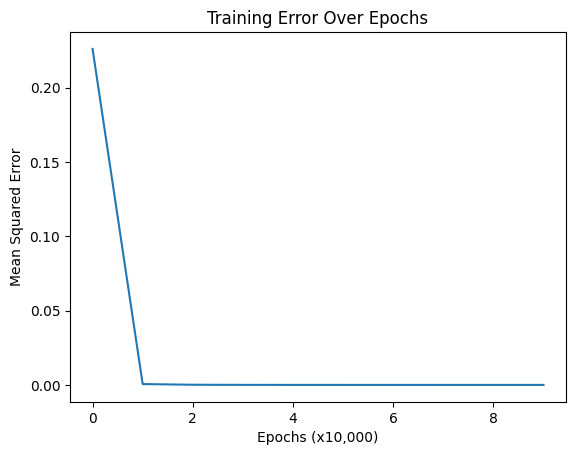

In [12]:
plt.plot(err_list)
plt.title('Training Error Over Epochs')
plt.xlabel('Epochs (x10,000)')
plt.ylabel('Mean Squared Error')
plt.show()

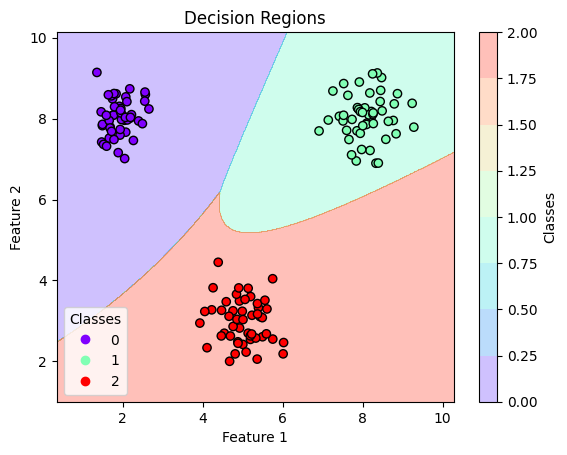

In [13]:
# Define a function to plot decision regions
def plot_decision_regions(features, labels, model):
    # Create a meshgrid
    x_min, x_max = features[:, 0].min() - 1, features[:, 0].max() + 1
    y_min, y_max = features[:, 1].min() - 1, features[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Flatten the grid and make predictions
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    predictions = model.forwardProp(grid_points)
    predicted_classes = np.argmax(predictions, axis=1)

    # Reshape predictions to match the grid shape
    predicted_classes = predicted_classes.reshape(xx.shape)

    # Plot the decision regions
    plt.contourf(xx, yy, predicted_classes, alpha=0.3, cmap=plt.cm.rainbow)
    plt.colorbar(label='Classes')

    # Scatter plot of the original data points
    scatter = plt.scatter(features[:, 0], features[:, 1], c=labels, edgecolor='k', cmap=plt.cm.rainbow)
    plt.legend(*scatter.legend_elements(), title="Classes")
    plt.title("Decision Regions")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Call the function with your data and trained model
plot_decision_regions(features_train, labels, NN)